In [2]:
!nvidia-smi

Sun Sep 25 17:58:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    63W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100-SXM...  Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [ ]:
# ! pip install https://github.com/huggingface/diffusers/archive/main.zip -qUU --ignore-installed


     | 245 kB 3.0 MB/s
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.1.0 requires pydantic!=1.8,!=1.8.1,<1.10.0,>=1.7.4, but you have pydantic 1.10.1 which is incompatible.
thinc 8.1.0 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.3.0 which is incompatible.
spacy 3.4.1 requires pydantic!=1.8,!=1.8.1,<1.10.0,>=1.7.4, but you have pydantic 1.10.1 which is incompatible.
spacy 3.4.1 requires typing-extensions<4.2.0,>=3.7.4; python_version < "3.8", but you have typing-extensions 4.3.0 which is incompatible.


In [3]:
! pip install transformers -q -UU ftfy gradio  

In [ ]:
! pip install --ignore-installed Pillow==9.0.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [3]:
! pip freeze | grep diffusers

diffusers==0.3.0


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
TOKEN = "YOUR_AUTH_TOKEN"

In [ ]:
##credit : Hugging Face Team
# import inspect
# from typing import List, Optional, Union

# import numpy as np
# import torch

# import PIL
# from diffusers import AutoencoderKL, DDIMScheduler, DiffusionPipeline, PNDMScheduler, UNet2DConditionModel
# from diffusers.pipelines.stable_diffusion import StableDiffusionSafetyChecker
# from tqdm.auto import tqdm
# from transformers import CLIPFeatureExtractor, CLIPTextModel, CLIPTokenizer


# def preprocess_image(image):
#     w, h = image.size
#     w, h = map(lambda x: x - x % 32, (w, h))  # resize to integer multiple of 32
#     image = image.resize((w, h), resample=PIL.Image.LANCZOS)
#     image = np.array(image).astype(np.float32) / 255.0
#     image = image[None].transpose(0, 3, 1, 2)
#     image = torch.from_numpy(image)
#     return 2.0 * image - 1.0

# def preprocess_mask(mask):
#     mask=mask.convert("L")
#     w, h = mask.size
#     w, h = map(lambda x: x - x % 32, (w, h))  # resize to integer multiple of 32
#     mask = mask.resize((w//8, h//8), resample=PIL.Image.NEAREST)
#     mask = np.array(mask).astype(np.float32) / 255.0
#     mask = np.tile(mask,(4,1,1))
#     mask = mask[None].transpose(0, 1, 2, 3)#what does this step do?
#     mask = 1 - mask #repaint white, keep black
#     mask = torch.from_numpy(mask)
#     return mask


# class StableDiffusionInpaintingPipeline(DiffusionPipeline):
#     def __init__(
#         self,
#         vae: AutoencoderKL,
#         text_encoder: CLIPTextModel,
#         tokenizer: CLIPTokenizer,
#         unet: UNet2DConditionModel,
#         scheduler: Union[DDIMScheduler, PNDMScheduler],
#         safety_checker: StableDiffusionSafetyChecker,
#         feature_extractor: CLIPFeatureExtractor,
#     ):
#         super().__init__()
#         scheduler = scheduler.set_format("pt")
#         self.register_modules(
#             vae=vae,
#             text_encoder=text_encoder,
#             tokenizer=tokenizer,
#             unet=unet,
#             scheduler=scheduler,
#             safety_checker=safety_checker,
#             feature_extractor=feature_extractor,
#         )

#     @torch.no_grad()
#     def __call__(
#         self,
#         prompt: Union[str, List[str]],
#         init_image: torch.FloatTensor,
#         mask_image: torch.FloatTensor,
#         strength: float = 0.8,
#         num_inference_steps: Optional[int] = 50,
#         guidance_scale: Optional[float] = 7.5,
#         eta: Optional[float] = 0.0,
#         generator: Optional[torch.Generator] = None,
#         output_type: Optional[str] = "pil",
#     ):

#         if isinstance(prompt, str):
#             batch_size = 1
#         elif isinstance(prompt, list):
#             batch_size = len(prompt)
#         else:
#             raise ValueError(f"`prompt` has to be of type `str` or `list` but is {type(prompt)}")

#         if strength < 0 or strength > 1:
#             raise ValueError(f"The value of strength should in [0.0, 1.0] but is {strength}")

#         # set timesteps
#         accepts_offset = "offset" in set(inspect.signature(self.scheduler.set_timesteps).parameters.keys())
#         extra_set_kwargs = {}
#         offset = 0
#         if accepts_offset:
#             offset = 1
#             extra_set_kwargs["offset"] = 1

#         self.scheduler.set_timesteps(num_inference_steps, **extra_set_kwargs)

#         #preprocess image
#         init_image = preprocess_image(init_image).to(self.device)

#         # encode the init image into latents and scale the latents
#         init_latents = self.vae.encode(init_image).sample()
#         init_latents = 0.18215 * init_latents

#         # prepare init_latents noise to latents
#         init_latents = torch.cat([init_latents] * batch_size)
#         init_latents_orig = init_latents

#         # preprocess mask
#         mask = preprocess_mask(mask_image).to(self.device)
#         mask = torch.cat([mask] * batch_size)

#         #check sizes
#         if not mask.shape == init_latents.shape:
#             raise ValueError(f"The mask and init_image should be the same size!")


#         # get the original timestep using init_timestep
#         init_timestep = int(num_inference_steps * strength) + offset
#         init_timestep = min(init_timestep, num_inference_steps)
#         timesteps = self.scheduler.timesteps[-init_timestep]
#         timesteps = torch.tensor([timesteps] * batch_size, dtype=torch.long, device=self.device)

#         # add noise to latents using the timesteps
#         noise = torch.randn(init_latents.shape, generator=generator, device=self.device)
#         init_latents = self.scheduler.add_noise(init_latents, noise, timesteps)

#         # get prompt text embeddings
#         text_input = self.tokenizer(
#             prompt,
#             padding="max_length",
#             max_length=self.tokenizer.model_max_length,
#             truncation=True,
#             return_tensors="pt",
#         )
#         text_embeddings = self.text_encoder(text_input.input_ids.to(self.device))[0]

#         # here `guidance_scale` is defined analog to the guidance weight `w` of equation (2)
#         # of the Imagen paper: https://arxiv.org/pdf/2205.11487.pdf . `guidance_scale = 1`
#         # corresponds to doing no classifier free guidance.
#         do_classifier_free_guidance = guidance_scale > 1.0
#         # get unconditional embeddings for classifier free guidance
#         if do_classifier_free_guidance:
#             max_length = text_input.input_ids.shape[-1]
#             uncond_input = self.tokenizer(
#                 [""] * batch_size, padding="max_length", max_length=max_length, return_tensors="pt"
#             )
#             uncond_embeddings = self.text_encoder(uncond_input.input_ids.to(self.device))[0]

#             # For classifier free guidance, we need to do two forward passes.
#             # Here we concatenate the unconditional and text embeddings into a single batch
#             # to avoid doing two forward passes
#             text_embeddings = torch.cat([uncond_embeddings, text_embeddings])

#         # prepare extra kwargs for the scheduler step, since not all schedulers have the same signature
#         # eta (η) is only used with the DDIMScheduler, it will be ignored for other schedulers.
#         # eta corresponds to η in DDIM paper: https://arxiv.org/abs/2010.02502
#         # and should be between [0, 1]
#         accepts_eta = "eta" in set(inspect.signature(self.scheduler.step).parameters.keys())
#         extra_step_kwargs = {}
#         if accepts_eta:
#             extra_step_kwargs["eta"] = eta

#         latents = init_latents
#         t_start = max(num_inference_steps - init_timestep + offset, 0)
#         for i, t in tqdm(enumerate(self.scheduler.timesteps[t_start:])):
#             # expand the latents if we are doing classifier free guidance
#             latent_model_input = torch.cat([latents] * 2) if do_classifier_free_guidance else latents

#             # predict the noise residual
#             noise_pred = self.unet(latent_model_input, t, encoder_hidden_states=text_embeddings)["sample"]

#             # perform guidance
#             if do_classifier_free_guidance:
#                 noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
#                 noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

#             # compute the previous noisy sample x_t -> x_t-1
#             latents = self.scheduler.step(noise_pred, t, latents, **extra_step_kwargs)["prev_sample"]

#             #masking
#             init_latents_proper = self.scheduler.add_noise(init_latents_orig, noise, t)
#             latents = ( init_latents_proper * mask ) + ( latents * (1-mask) )

#         # scale and decode the image latents with vae
#         latents = 1 / 0.18215 * latents
#         image = self.vae.decode(latents)

#         image = (image / 2 + 0.5).clamp(0, 1)
#         image = image.cpu().permute(0, 2, 3, 1).numpy()

#         # run safety checker
#         safety_cheker_input = self.feature_extractor(self.numpy_to_pil(image), return_tensors="pt").to(self.device)
#         image, has_nsfw_concept = self.safety_checker(images=image, clip_input=safety_cheker_input.pixel_values)

#         if output_type == "pil":
#             image = self.numpy_to_pil(image)

#         return {"sample": image, "nsfw_content_detected": has_nsfw_concept}


In [ ]:
#!wget https://raw.githubusercontent.com/huggingface/diffusers/main/examples/inference/inpainting.py

In [ ]:
from io import BytesIO

from torch import autocast
import requests
import PIL
import torch
from diffusers import StableDiffusionInpaintPipeline as StableDiffusionInpaintPipeline

In [4]:
def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")

In [6]:
img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"


In [6]:
img = PIL.Image.open("/home/user/thumbnail-stable-diffusion/data/cocomelon_ftuned_5000_steps/playing with baloons_step_5000_5000_1.png")

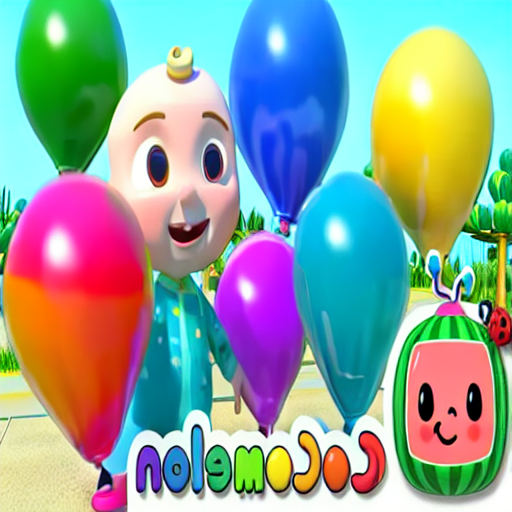

In [12]:
img

In [7]:
init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))

In [8]:
device = "cuda"
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=TOKEN,
).to(device)

{'trained_betas'} was not found in config. Values will be initialized to default values.


In [13]:
init_image = img

In [11]:
prompt = "baby in superman suit"

In [14]:
with autocast("cuda"):
    images = pipe(prompt=prompt, init_image=init_image, mask_image=mask_image, strength=0.75)["sample"]


NameError: name 'mask_image' is not defined

In [13]:
images[0].save("cat_on_bench.png")


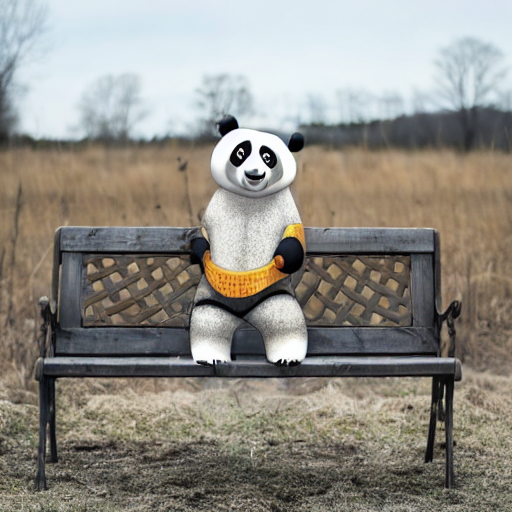

In [14]:
images[0]

In [9]:
import gradio as gr

In [15]:
def predict(dict, prompt):
  init_img =  dict['image'].convert("RGB").resize((512, 512))
  mask_img = dict['mask'].convert("RGB").resize((512, 512))
  with autocast("cuda"):
    images = pipe(prompt=prompt, init_image=init_img, mask_image=mask_img, strength=0.75)["sample"]

  return(images[0])

In [16]:
gr.Interface(
    predict,
    title = 'Stable Diffusion In-Painting Tool on Colab with Gradio',
    inputs=[
        gr.Image(source = 'upload', tool = 'sketch', type = 'pil'),
        gr.Textbox(label = 'prompt')
    ],
    outputs = [
        gr.Image()
        ],
).launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://25755.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7fb3a5652d30>,
 'http://127.0.0.1:7860/',
 'https://25755.gradio.app')

38it [00:02, 14.07it/s]
38it [00:02, 14.44it/s]
38it [00:02, 14.38it/s]
38it [00:02, 14.54it/s]
